In [78]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from data.datasets import TrainingDataSet
from config.datasets import dataset_configs
import matplotlib.pyplot as plt
cfg = dataset_configs['other']['training']
filtered_csv = os.path.join(cfg['bpath'], cfg['csv'])
original_csv = os.path.join(cfg['bpath'], cfg['csv'].replace('_filtered', ''))

good_df = pd.read_csv(filtered_csv)
original_df = pd.read_csv(original_csv)

bad_df = original_df[~original_df.index.isin(good_df.index)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
good_df['is_bead'] = True
bad_df['is_bead'] = False

df = pd.concat((good_df, bad_df))
print(good_df.shape)
print(bad_df.shape)

(139, 10)
(173, 10)


<ipython-input-79-93bcf634ff0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_df['is_bead'] = False


['frame', 'x [nm]', 'y [nm]', 'sigma [nm]', 'intensity [photon]', 'offset [photon]', 'bkgstd [photon]', 'chi2', 'uncertainty_xy [nm]', 'is_bead']


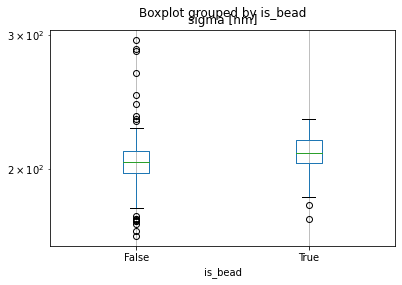

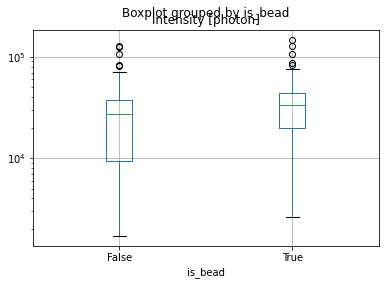

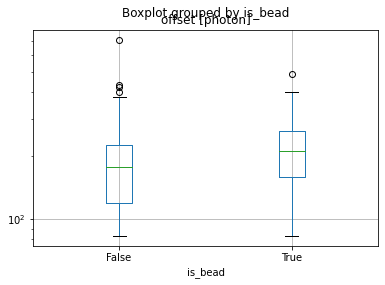

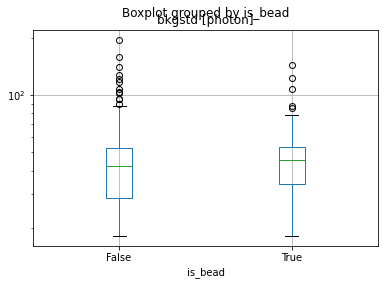

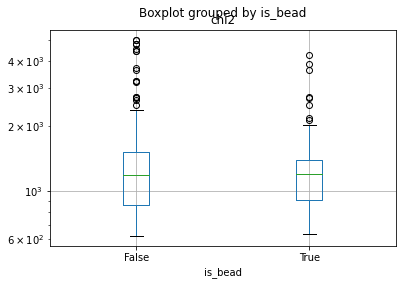

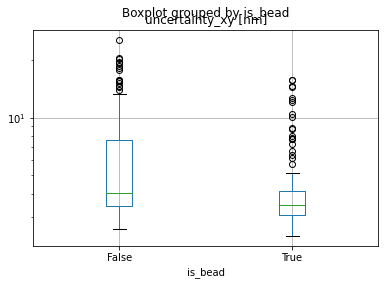

In [80]:
cols = list(df)
print(cols)
for c in cols:
    if c in ['frame', 'x [nm]', 'y [nm]', 'is_bead']:
        continue
    df.boxplot(by='is_bead', column=c)
    plt.yscale('log')
    plt.show()

In [81]:
print(list(df))

X = df[['sigma [nm]', 'intensity [photon]', 'bkgstd [photon]', 'chi2', 'uncertainty_xy [nm]']]
y = df['is_bead']

for col in X:
    print(col, df[col].corr(y))
X = X.to_numpy()
y = y.to_numpy()

['frame', 'x [nm]', 'y [nm]', 'sigma [nm]', 'intensity [photon]', 'offset [photon]', 'bkgstd [photon]', 'chi2', 'uncertainty_xy [nm]', 'is_bead']
sigma [nm] 0.16174918040904446
intensity [photon] 0.16930997868532568
bkgstd [photon] -0.0103905293575335
chi2 -0.10083887626844124
uncertainty_xy [nm] -0.24062193313736413


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

(312, 5)
(312,)
0.4368932038834951
